# Introduktion til Signal Analyse – ECG og Numeriske Beregninger

## Anvendt Programmering

> Martin Siemienski Andersen <mvan@hst.aau.dk>

# Hvad og Hvorfor?

- EKG
- Etiske Overvejelser
- NumPy
- Signal Analyse Flow
- Statistik
- Støj og filtre (Hvad er støj)
- Feature Extraction

# ECG

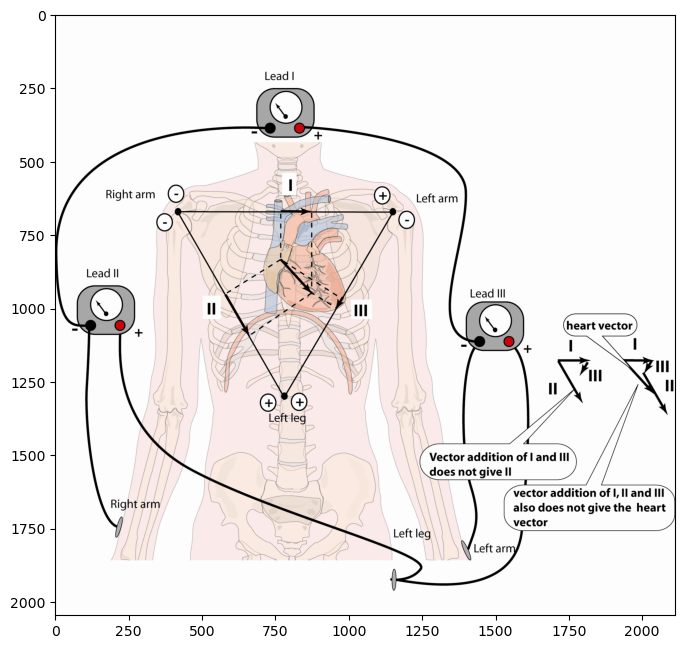

In [20]:
plt.figure(figsize=[8,8])
plt.imshow(plt.imread("files/ekg0.png"))
plt.show()

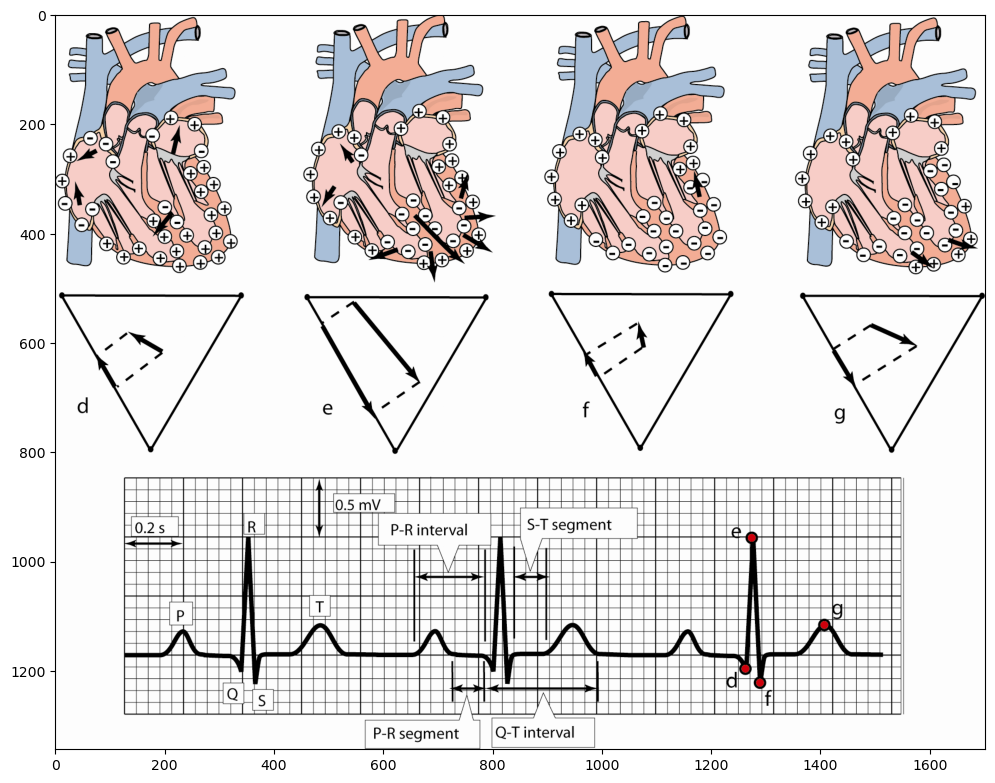

In [30]:
plt.figure(figsize=[12,12])
plt.imshow(plt.imread("files/ekg2.png"))
plt.show()

# Etik Mini-Emne: ECG som Følsom Sundhedsdata

## En dag med et ECG

- Forestil dig en patient, der kommer til lægen.
- Lægen sætter elektroder på brystet og tager et ECG.
- Formålet: at tjekke hjerterytmen.

**Talerpunkter:**
- Start med et simpelt scenarie, publikum kan relatere til.
- Introducer ECG som en rutineundersøgelse, der virker harmløs.

## Hvad ser vi i ECG-signalet?

- Hjerterytme og puls
- Tydelige mønstre i hjertets elektriske aktivitet
- ECG indeholder mere end blot øjeblikkelig sundhed

**Talerpunkter:**
- Forklar, at ECG gemmer information om hjertet.
- Introducer ideen om skjult information.

## Biometrisk identifikation

- ECG-signalet er unikt for hver person
- Kan bruges som en form for “fingeraftryk”
- Risiko: hvis data deles, kan personen identificeres uden samtykke

**Talerpunkter:**
- Fremhæv forskellen mellem data og identitet.
- Giv eksempel: ECG som adgangskontrol (biometrisk login).

## Latente sygdomsmarkører (det patienten ikke selv vidste)

- ECG kan afsløre skjulte sygdomme:
  - Arytmier
  - Risiko for hjerteanfald
- Patient kan være uvidende om disse risici

**Talerpunkter:**
- Diskuter etiske problemstillinger ved uventet information.

## Permanent sundhedshistorik

- ECG-data afspejler hjertets mønstre over tid
- Engang lagret, kan det ikke “tages tilbage”
- Fremtidige risici: forsikring, arbejde, anonymitet

**Talerpunkter:**
- Sammenlign med DNA og medicinsk journal.
- Tal om konsekvenser ved permanent lagring.

## Naturlige scenarier

- Hospital: ECG-data bruges til diagnostik
- Wearables: konstant overvågning
- Forskning: deling af store datasæt

**Talerpunkter:**
- Vise, hvordan forskellige situationer bringer forskellige etiske risici.
- Spørg publikum: Hvilken situation tror I er mest risikabel?

## Etiske udfordringer

- Informed consent er vigtigt
- Data-minimering: kun det nødvendige
- Sikker opbevaring og anonymisering
- Ansvarlig deling til forskning eller klinik

**Talerpunkter:**
- Diskuter principperne bag håndtering af sundhedsdata.
- Fremhæv ansvar og konsekvenser.

## Hvad vi skal tage med os

- ECG-data er ikke bare signaler
- Kan identificere individer
- Kan afsløre skjulte sygdomme
- Repræsenterer permanent sundhedshistorik
- Etik skal styre håndtering

**Talerpunkter:**
- Opsummer historien fra start til slut.
- Skab en klar “moral” om ansvar.

## Diskussion / spørgsmål

- Hvordan håndteres ECG-data i wearables?
- Kan anonymisering altid beskytte patienten?
- Skal ECG bruges til biometrisk autentifikation?

**Talerpunkter:**
- Stimuler interaktion med publikum.
- Diskuter realistiske scenarier og etiske dilemmaer.

# Hvorfor NumPy?

- Python lister er ueffektive til numeriske beregninger
- NumPy er vektoriserede, og er effektive i hukommelsesbrug
- Der er indbyggede metoder som kan benyttes, så som `mean`, `std` man kan benytte

In [2]:
import numpy as np
py_list = [1, 2, 3, 4, 5]
np_array = np.array(py_list)
print("Manual mean:", sum(py_list)/len(py_list))
print("NumPy mean:", np.mean(np_array))

print(py_list+py_list)
print(np_array+np_array)


Manual mean: 3.0
NumPy mean: 3.0
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
[ 2  4  6  8 10]



# Data Workflow

```mermaid
flowchart LR
    A[Load Data] --> B[Inspect]
    B --> C[Clean]
    C --> D[Visualize]
    D --> E[Extract Features]
    E --> F[Store]
```
## Inspect


## Exercise: Inspect

Du ved nu:
- Hvad en `csv` fil er
- Hvordan man loader data ind med `numpy`
- Hvordan man visualiserer data med `matplotlib`

Du skal nu:
- Lav et program `inspect_random_signal.py`
- Plotte og inspektserer data fra hhv `files/random_signal1.csv` og `files/random_signal2.csv` i samme plot.
- Fortæl med egne ord, hvad de 2 signaler ligner og hvordan de 2 datasæt er forskellige fra hinanden
    - Er der forskel i amplituderne på signalerne?
    - Er der forskel i støj på singalerne?
    - Hvad ligner signalerne, hvis man (forsøger at) ignorerer støjen?
  

## Answer

**Plot signalerne**

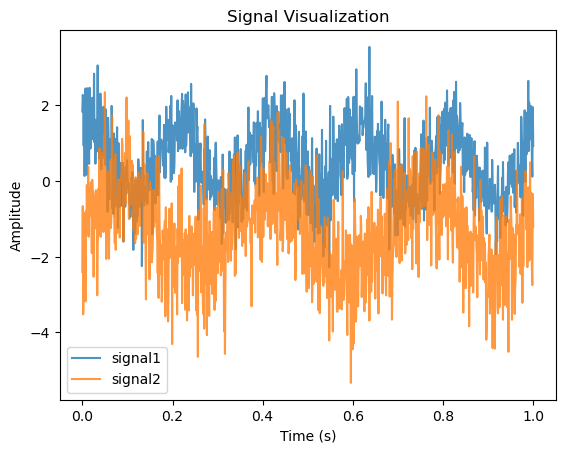

In [13]:
import matplotlib.pyplot as plt
import numpy as np
signal1 = np.loadtxt("files/random_signal1.csv")
signal2 = np.loadtxt("files/random_signal2.csv")
dt = 1.0/len(signal1)
Fs = 1/dt
T = np.linspace(0,1,len(signal1))


plt.plot(T,signal1, label="signal1", alpha=0.8)
plt.plot(T,signal2, label="signal2",alpha=0.8)
plt.title("Signal Visualization")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

**Fortæl med egne ord, hvad de 2 signaler ligner og hvordan de 2 datasæt er forskellige fra hinanden**
- Signal 1 har et signal som har højere værdier
- Det kunne godt se ud som om at der er mere støj på Signal 2 end Signal 1.
- Det kunne godt ligne at de to signaler er sinus kurver, med en masse støj.
- Det kunne godt se ud som om at Signal 1 har en mindre periode T, ift. Signal 2, da der er flere høje peaks.

## Inspect: Visualizing Statistics

mean1_val=0.4889014709848078, std1_val=0.9666732803243623


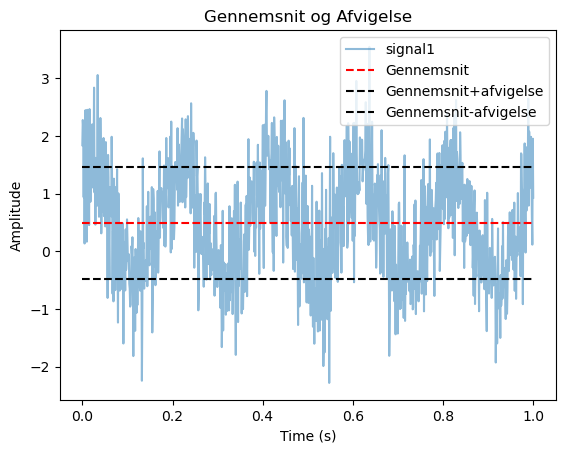

In [4]:
test_signal = signal1
mean1_val = float(np.mean(test_signal))
std1_val = float(np.std(test_signal))

print(f"{mean1_val=}, {std1_val=}")

plt.plot(T, test_signal,label="signal1", alpha=0.5) # alpha betyder gennemsigtighed
plt.plot([0,1],[mean1_val, mean1_val], linestyle="--",color="r", label="Gennemsnit")
plt.plot([0,1],[mean1_val+std1_val, mean1_val+std1_val], linestyle="--",color="k", label="Gennemsnit+afvigelse")
plt.plot([0,1],[mean1_val-std1_val, mean1_val-std1_val], linestyle="--",color="k", label="Gennemsnit-afvigelse")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Gennemsnit og Afvigelse")
plt.show()



## Inspect: General Signal Feature Visualization

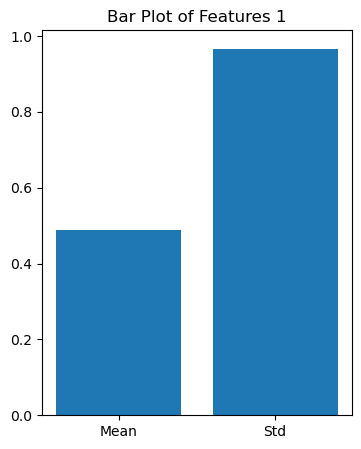

In [5]:
test_signal = signal1 
mean1_val = float(np.mean(test_signal))
std1_val = float(np.std(test_signal))
plt.figure(figsize=[4,5])
# Bar plot of mean, variance, std
plt.bar(['Mean','Std'], [mean1_val,std1_val], )
plt.title("Bar Plot of Features 1")
plt.show()

# Data Workflow

```mermaid
flowchart LR
    A[Load Data] --> B[Inspect]
    B --> C[Clean]
    C --> D[Visualize]
    D --> E[Extract Features]
    E --> F[Store]
```

## **Clean**: Hvorfor bruger vi filtre?

**Formål**
Et filter bruges til at selektivt ændre signaler eller data ved at fremhæve det, vi ønsker, og undertrykke det, vi ikke ønsker.

**Hovedårsager**
- **Fjern støj**: Reducer uønskede forstyrrelser og bevar nyttig information.
- **Finde relevante features**: Isoler specifikke frekvensbånd, tendenser eller hændelser.
- **Øge forståeligheden**: Gør signaler og data nemmere at analysere og visualisere.
- **Opfyld systemkrav**: Forhindre aliasing, stabilisere kontrolsystemer eller matche sensorens båndbredde.
- **Bedre ydeevne**: Øg nøjagtigheden i detektion, estimering og beslutningstagning.

**Almindelige eksempler**
- Lavpasfilter: fjern højfrekvent støj  
- Højpasfilter: fjern langsom drift eller baseline  
- Båndpasfilter: isoler et specifikt frekvensområde

**Konklusion**
> Filtre hjælper os med at fokusere på **det, der er vigtigt**, i nærvær af **det, der ikke er**.

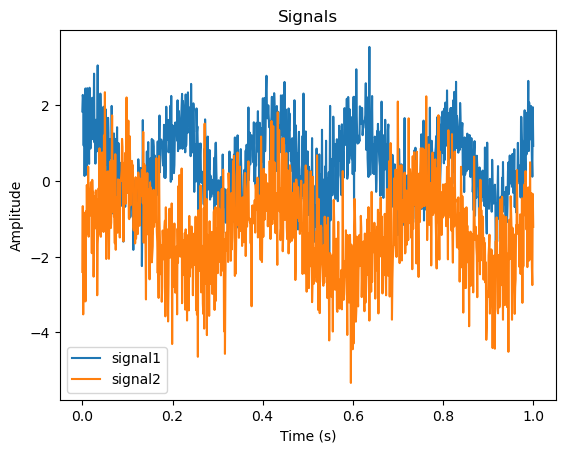

In [6]:
plt.plot(T,signal1, color="C0", label="signal1")
plt.plot(T,signal2, color="C1",label="signal2")
plt.legend()
plt.title("Signals")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

## Moving Average Filter
* **Udglatter data**: Reducerer kortsigtet støj og fremhæver overordnede tendenser.
* **Glidende gennemsnit**: Hvert punkt er gennemsnittet af omkringliggende værdier inden for et valgt vindue.
* **Enkel og alsidig**: Kan bruges på signaler, tidsserier eller sekventielle data for at afsløre underliggende mønstre.

>```text
>FUNCTION moving_average_filter(data, window):
>    FOR each index `i` in data:
>        take the points within the window, centered at i
>        calculate their average
>        set smoothed_data[i] = average
>    RETURN smoothed_data
>```

In [7]:
def moving_average_filter(data, window: int):
    N = len(data)
    smoothed = np.zeros_like(data)
    raise NotImplementedError("Implementer denne funciton")



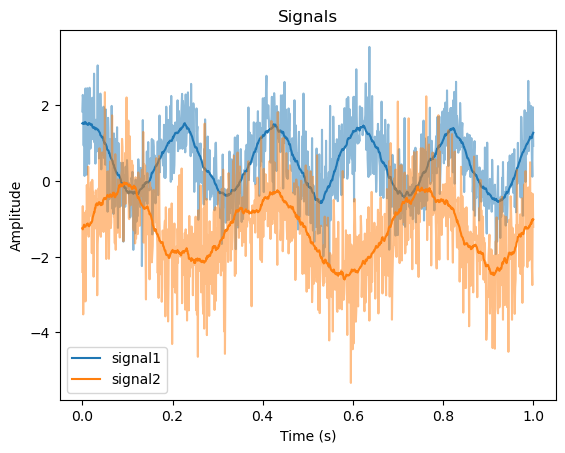

1000.0

In [15]:
def moving_average_filter(data: np.ndarray, window: int):
    N = len(data)
    smoothed = np.zeros_like(data)
    halfwindow = window//2
    for i in range(N):
        start = max(0, i - halfwindow)
        end = min(N, i + halfwindow + 1)
        smoothed[i] = data[start:end].mean()

    return smoothed

window_size  = 40
smoothed_signal1 = moving_average_filter(signal1,window_size)
smoothed_signal2 = moving_average_filter(signal2,window_size)

plt.plot(T,signal1, color="C0", alpha=0.5)
plt.plot(T,smoothed_signal1, color="C0", label="signal1")
plt.plot(T,signal2, color="C1", alpha=0.5)
plt.plot(T,smoothed_signal2, color="C1", label="signal2")
plt.legend()
plt.title("Signals")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

## Variability Metrics

*   R-peak: Highest point in QRS complex
*   RR interval: Time between consecutive R-peaks
*   Variability metrics: Mean RR, SDNN, RMSSD

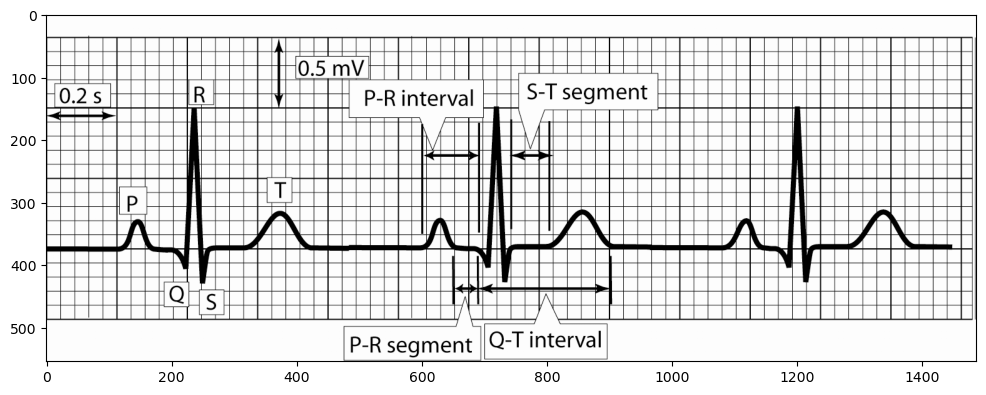

In [34]:
plt.figure(figsize=[12,12])
plt.imshow(plt.imread("files/ekg1.png"))
plt.show()

* **R-peak** = the highest point of the QRS complex
* **RR interval** = time between consecutive R-peaks

### **SDNN (Standard Deviation of NN intervals)**

* **What it is:**
  The standard deviation of all **NN (normal-to-normal) RR intervals** in the recording.
* **What it measures:**
  Overall heart rate variability (`HRV`), reflecting both short-term and long-term variability.
* **How it’s computed:**
  If ($RR_1, RR_2, \dots, RR_N$) are NN intervals:
$$
  \text{SDNN} = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (RR_i - \overline{RR})^2}
$$
* **Typical units:** milliseconds (ms)

### **RMSSD (Root Mean Square of Successive Differences)**

* **What it is:**
  The root mean square of differences between **successive NN intervals**.
* **What it measures:**
  Short-term HRV, strongly influenced by parasympathetic (vagal) activity.
* **How it’s computed:**
  $$
  \text{RMSSD} = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N-1} (RR_{i+1} - RR_i)^2}
  $$
* **Typical units:** milliseconds (ms)

  

### **In short**
* **SDNN** → overall variability across the whole recording
* **RMSSD** → beat-to-beat (short-term) variability

## Exercises

1.  Load ECG and compute basic stats
2.  Simple R-peak detection (threshold = mean + std)
3.  Plot annotated ECG
4.  Save extracted features to CSV